# Unconfounded Children
This notebook analyses a linear SCM that comes from
a lecture by Brady Neal, who attributes it to 
a Tian & Pearl 2002 paper, and says it's an example
of the "unconfounded 
children" criterion. This SCM does not satisfy either
the backdoor or frontdoor criteria, but the query
$P(y|do(x))$ is still known to be identifiable for this SCM.

The most general way to decide whether a do query for
a particular DAG is identifiable, is by using Pearl's
Do Calculus rules. However, those rules are fairly 
complicated and therefore hard  to automate.

We contend that by analyzing any DAG **symbolically**, in the
linear regime, using SCuMpy, one can decide rigorously  whether a
do query for that DAG is identifiable or not. Hence, SCuMpy
allows us, *if we have a single specific DAG in mind*, to bypass and supplant, in an automated 
fashion, the Do Calculus rules!

As shown in the example below, all we have to do
to prove identifiability of 
the query
$P(y|do(x))$,
is to show that,
after we amputate all arrows entering $\underline{y}$,
the covariance
$\langle \underline{x}, \underline{y}\rangle$
becomes independent of the hidden (unobserved) variables.
It doesn't get simpler than that!

In [1]:
# this makes sure it starts looking for things from the scumpy folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\scumpy


In [2]:
from Graph import *
from CovMatCalculator import *

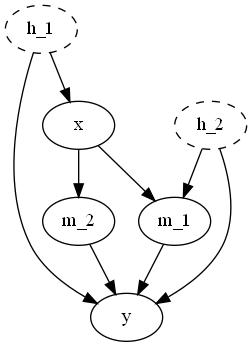

In [3]:
path = 'dot_atlas/unconfounded-children.dot'
graph = Graph(path)
graph.draw(jupyter=True)

In [4]:
cal = CovMatCalculator(graph)
cal.calculate_cov_mat_sb()
cal.print_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{h_1}, \underline{h_1}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_1}, \underline{h_2}\right\rangle=0
\\
\left\langle\underline{h_1}, \underline{x}\right\rangle=\alpha_{\underline{x}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_1}, \underline{m_1}\right\rangle=\alpha_{\underline{m_1}|\underline{x}} \alpha_{\underline{x}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_1}, \underline{m_2}\right\rangle=\alpha_{\underline{m_2}|\underline{x}} \alpha_{\underline{x}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_1}, \underline{y}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{h_1}}} \left(\alpha_{\underline{m_1}|\underline{x}} \alpha_{\underline{x}|\underline{h_1}} \alpha_{\underline{y}|\underline{m_1}} + \alpha_{\underline{m_2}|\underline{x}} \alpha_{\unde

In [5]:
cal.print_jacobian_entries()

\begin{array}{l}
\frac{\partial\underline{h_1}}{\partial\underline{h_1}}=1
\\
\frac{\partial\underline{h_1}}{\partial\underline{h_2}}=0
\\
\frac{\partial\underline{h_1}}{\partial\underline{x}}=\frac{\alpha_{\underline{x}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}}{\alpha_{\underline{x}|\underline{h_1}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}} + \sigma^2_{\underline{\epsilon}_{\underline{x}}}}
\\
\frac{\partial\underline{h_1}}{\partial\underline{m_1}}=\frac{\alpha_{\underline{m_1}|\underline{x}} \alpha_{\underline{x}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}}{\alpha_{\underline{m_1}|\underline{h_2}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{h_2}}} + \alpha_{\underline{m_1}|\underline{x}}^{2} \alpha_{\underline{x}|\underline{h_1}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}} + \alpha_{\underline{m_1}|\underline{x}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{x}}} + \sigma^2_{\underline{\epsilon}_{\underline{m_

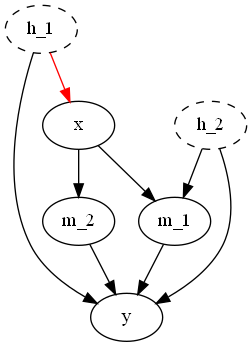

In [6]:
path = 'dot_atlas/unconfounded-children.dot'
graph = Graph(path,
             amputated_edges=[("h_1", "x")])
# amputated edges in red, non-amputated ones in black
graph.draw(jupyter=True)

In [7]:
cal = CovMatCalculator(graph)
cal.calculate_cov_mat_sb()
cal.print_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{h_1}, \underline{h_1}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_1}, \underline{h_2}\right\rangle=0
\\
\left\langle\underline{h_1}, \underline{x}\right\rangle=0
\\
\left\langle\underline{h_1}, \underline{m_1}\right\rangle=0
\\
\left\langle\underline{h_1}, \underline{m_2}\right\rangle=0
\\
\left\langle\underline{h_1}, \underline{y}\right\rangle=\alpha_{\underline{y}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}
\\
\left\langle\underline{h_2}, \underline{h_1}\right\rangle=0
\\
\left\langle\underline{h_2}, \underline{h_2}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{h_2}}}
\\
\left\langle\underline{h_2}, \underline{x}\right\rangle=0
\\
\left\langle\underline{h_2}, \underline{m_1}\right\rangle=\alpha_{\underline{m_1}|\underline{h_2}} \sigma^2_{\underline{\epsilon}_{\underline{h_2}}}
\\
\left\langle\underline{h_2}, \underline{m_2}\right\rangle=0
\\
\left\langle\underline{h

In [8]:
cal.print_jacobian_entries()

\begin{array}{l}
\frac{\partial\underline{h_1}}{\partial\underline{h_1}}=1
\\
\frac{\partial\underline{h_1}}{\partial\underline{h_2}}=0
\\
\frac{\partial\underline{h_1}}{\partial\underline{x}}=0
\\
\frac{\partial\underline{h_1}}{\partial\underline{m_1}}=0
\\
\frac{\partial\underline{h_1}}{\partial\underline{m_2}}=0
\\
\frac{\partial\underline{h_1}}{\partial\underline{y}}=\frac{\alpha_{\underline{y}|\underline{h_1}} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}}}{\alpha_{\underline{y}|\underline{h_1}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{h_1}}} + \alpha_{\underline{y}|\underline{m_1}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{m_1}}} + \alpha_{\underline{y}|\underline{m_2}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{m_2}}} + \sigma^2_{\underline{\epsilon}_{\underline{h_2}}} \left(\alpha_{\underline{m_1}|\underline{h_2}} \alpha_{\underline{y}|\underline{m_1}} + \alpha_{\underline{y}|\underline{h_2}}\right)^{2} + \sigma^2_{\underline{\epsilon}_{\underline{x}}} \left(\